In [41]:
import os
import sys
import time
import numpy as np

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# IMPORT DATASET

In [42]:
import pandas as pd

# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

In [44]:


data = pd.read_csv('../../source_datasets_fusion/Book/book.txt', sep="\t", names=["Source", "ISBN", "Title", "Author list"])
data

,Source,ISBN,Title,Author list
0,eCampus.com,0201853949,"The art Of Computer Programming, Fascicle 3: G...",Not Available
1,Indoo.com,0201853949,"Art of Computer Programming, Volume 4, Fascicl...","Knuth, Donald E."
2,textbookxdotcom,0201853949,"The 'art Of Computer Programming, Fascicle 3 G...",NaN
3,A1Books,0201853949,"The Art of Computer Programming, Volume 4, Fas...","Knuth, Donald E."
4,textbooksNow,0201853949,Art of Computer Programming,Knuth
...,...,...,...,...
33966,www.textbooksrus.com,0138569231,Multimedia Communications: Protocols and Appli...,Franklin F. Kuo|Wolfgang Effelsberg|J. J. Garc...
33967,OPOE-ABE Books,0138569231,MULTIMEDIA COMMUNICATIONS,KUO
33968,textbookxdotcom,0138569231,Multimedia Communications Protocols and Applic...,Wolfgang Effelsberg
33969,paperbackworld.de,0138569231,Multimedia Communications: Protocols and Appli...,"Frank Kuo, J. J. Luna"


In [31]:
uniqueISBN = data.ISBN.unique()
len(uniqueISBN)

1265

In [68]:
table = data.loc[data['ISBN'] == "0201615924"]
print(len(table))
table


34


,Source,ISBN,Title,Author list
17187,International Books,0201615924,Advanced Use Case Modeling : Software Systems ...,"Frank Armour , Granville Miller"
17188,A1Books,0201615924,Advanced Use Case Modeling: Software Systems,"Armour, Frank, Miller, Granville"
17189,BEST BARGAIN BOOKS,0201615924,Advanced Use Case Modeling: Software Systems,Frank Armour; Granville Miller
17190,Bookmantra.com,0201615924,Advanced Use Case Modeling - Software Systems,"Miller, Granville,"
17191,Indoo.com,0201615924,Advanced Use Case Modeling: Software Systems,"Armour, FrankMiller, Granville"
17192,Browns Books,0201615924,Advanced Use Case Modelling,"Armour, Frank"
17193,A1Books,0201615924,Advanced Use Case Modeling: Software Systems,"Armour, Frank, Miller, Granville"
17194,textbookxdotcom,0201615924,Advanced Use Case Modeling Software Systems,Frank Armour
17195,Caiman,0201615924,ADVD USE CASE MODELING,"Armour, Frank"
17196,Powell's Books,0201615924,Advanced Use Case Modeling Software Sy,"Armour, Frank"


# SENTENCE EMBEDDING

In [46]:
params = {}

In [47]:
from embedding_algorithms.inferSent import set_RNN_embedding
start = time.time()
model_type = "bilstm" 
char_level = False
model_version = 2
rnn_dim = 1024
verbose = 1
set_RNN_embedding(model_type, char_level, model_version, rnn_dim, verbose)
print("TIME: {0}".format(time.time() - start))

params['embedding'] = {
    'name': 'Infersent',
    'model_type': model_type,
    'char_level': char_level,
    'model_version': model_version,
    'rnn_dim': rnn_dim,
    'verbose': verbose
}

Vocab size : 2196017
TIME: 242.07889413833618


In [52]:
from embedding_algorithms.inferSent import RNN_embedding
attr_list = ['Title', 'Author list']
params['attr_list'] = attr_list
embeddings_tokens = RNN_embedding(table, attr_list, model_type, char_level)
embeddings_tokens = np.array(embeddings_tokens)

attrs: ['Title', 'Author list']


# DIMENSION REDUCTION + BLOCKING

In [53]:
from dimensionality_reduction_algorithms.tsne import tsne_dim_reduction
tsne_embeddings = tsne_dim_reduction(
    embeddings_tokens, 
    num_components=2,
    early_exaggeration=12,
    verbose=1,
    perplexity=10,
    method="barnes_hut")

params['reduction'] = {
    'name': 'TSNE',
    'num_components': 2,
    'early_exaggeration': 12,
    'verbose': 1,
    'perplexity': 10,
    'method': "barnes_hut"
}

starting dimension: 2048
setting TSNE with n_components: 2 & perplexity: 10
early_exaggeration: 12


In [130]:
from cluster_algorithms.hierarchy_cluster import hierarchy_cluster
num_clusters = 10
blocks = hierarchy_cluster(tsne_embeddings, {'num_clusters': num_clusters})

params['blocking'] = {
    'name': 'hierarchy',
    'num_clusters': num_clusters
}

clustering with NUM_CLUSTERS = 10, 


In [131]:
blocks

{2: [0, 7, 9],
 1: [1, 4, 6, 11, 12, 17, 20, 26],
 7: [2, 23, 29],
 6: [3, 19, 31],
 9: [5, 21],
 4: [8, 10, 16],
 0: [13, 14, 22, 25, 33],
 8: [15, 27, 30],
 3: [18, 28],
 5: [24, 32]}

In [61]:
from sklearn.cluster import AgglomerativeClustering
def hierarchy_cluster_fusion(embeddings, key_values):

    # SET PARAMETERS
    NUM_CLUSTERS = key_values['num_clusters']

    # CLUSTERING
    print('clustering with NUM_CLUSTERS = {0}, '.format(NUM_CLUSTERS))
    cluster = AgglomerativeClustering(
        n_clusters=NUM_CLUSTERS, affinity='euclidean', linkage='ward')
    cluster.fit_predict(embeddings)
    return cluster.fit_predict(embeddings)

In [124]:
num_clusters = 5
blocks = hierarchy_cluster_fusion(tsne_embeddings, {'num_clusters': num_clusters})

params['blocking'] = {
    'name': 'hierarchy',
    'num_clusters': num_clusters
}

clustering with NUM_CLUSTERS = 5, 


In [125]:
blocks

array([1, 0, 1, 0, 0, 3, 0, 1, 2, 1, 2, 0, 0, 4, 4, 2, 2, 0, 3, 0, 0, 3,
       4, 1, 0, 4, 0, 2, 3, 1, 2, 0, 0, 4])

In [126]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(tsne_embeddings, blocks)
print(clf.centroids_)

[[  460.94137573  1715.9407959 ]
 [-1069.30249023  -140.54437256]
 [ 1366.48474121 -2883.09667969]
 [-2081.84765625  1933.35058594]
 [    9.97639179 -1490.85705566]]


In [72]:
clf.classes_

array([0, 1])

In [112]:
import random
def random_color(n):
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    step = 256 / n
    r += step
    g += step
    b += step
    r = int(r) % 256
    g = int(g) % 256
    b = int(b) % 256
    return r,g,b

def rgb2hex(r,g,b):
    return "#{:02x}{:02x}{:02x}".format(r,g,b)

In [118]:
dic = {}
count = 1000

chosen_labels = []
remove_index = []
colors = {}
init_color = 1

for i in range(len(blocks)):
    if blocks[i] not in dic.keys():
        dic[blocks[i]] = 1
        r, g, b = random_color(init_color)
        colors[blocks[i]] = rgb2hex(r,g,b)
        init_color = init_color + 1
    elif dic[blocks[i]] < count:
        dic[blocks[i]] = dic[blocks[i]] + 1
    else: 
        remove_index.append(i)
        continue
    chosen_labels.append(blocks[i])
 

In [119]:
chosen_labels.append(2)
chosen_labels.append(2)
r, g, b = random_color(9)
colors[2] = rgb2hex(r,g,b)
len(chosen_labels)

36

In [120]:
chosen_labels

[0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 2]

In [121]:
len(tsne_embeddings)

34

36


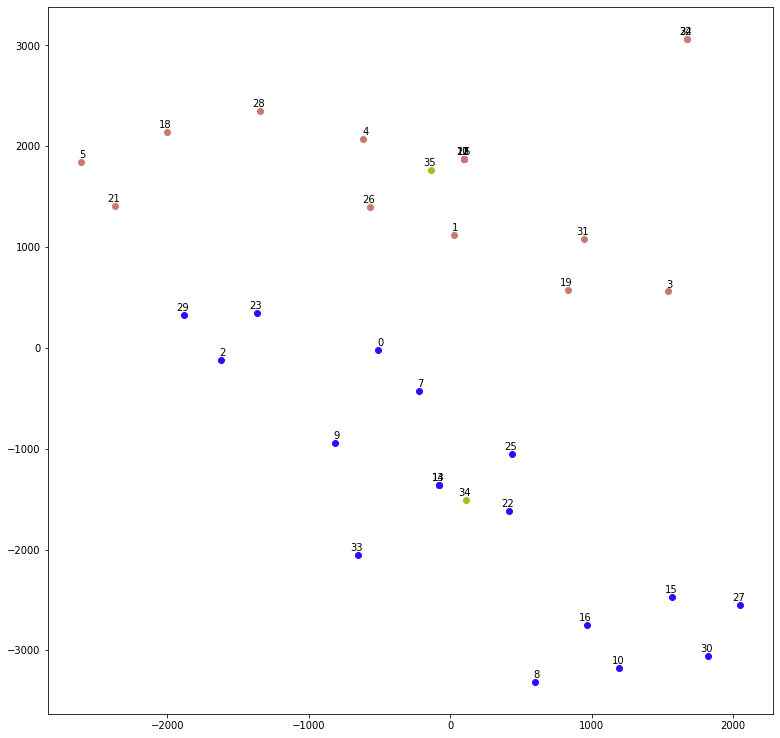

In [122]:
import matplotlib.pyplot as plt
x = []
y = []
for emb in tsne_embeddings:
    x.append(emb[0])
    y.append(emb[1])
    
x.append(107.822052)
y.append(-1505.65466309)

x.append(-137.36193848)
y.append(1767.0958252)

print(len(x))

plt.figure(figsize=(13, 13)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i],  c=colors[chosen_labels[i]])
    plt.annotate(i,
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom')
plt.show()